# Differential Equations and Models of Neuronal Action Potentials

What is the use of DEs in psychology and neuroscience? Measures of change

## What is a _DE_?


## Notations

$\frac{dy}{dx}$

$\dot{x}$

$x'$

$f'(x)$

### Derivatives are Instantaneous Slopes ###

You pick two points that are "close enough" and you get an answer that is "close enough."  If your answer isn't "close enough" then you move your points closer, until _in the limit_ there is an infinitesimal distance between them.

Definition:

$\frac{dy}{dx} = \lim_{h \to 0}\frac{f(x + h) - f(x)}{(x + h) - x}$

## Slopes Graphed

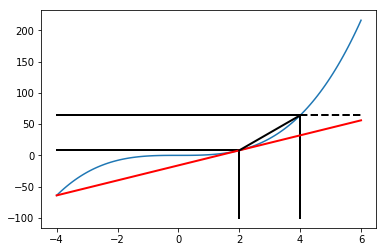

In [63]:
%matplotlib inline
import matplotlib, numpy
import matplotlib.pyplot as p
a = numpy.linspace(-4,6,num=120)
b = [x**3 for x in a];#list comprehension
p.plot(a,b)
p.plot([2,2],[-100,8], 'k-',lw=2)
p.plot([-4,2],[8,8], 'k-',lw=2)
p.plot([4,4],[64,-100], 'k-',lw=2)
p.plot([-4,6],[-64,56], 'r-',lw=2)
p.plot([-4,4],[64,64], 'k-',lw=2)
p.plot([4,6],[64,64], 'k--',lw=2)
p.plot([2,4],[8,64], 'k-',lw=2)
p.show()

#### What is a square root?
 #### What is the **solution** to $y=x^2$?

**Intuition Pumps for how to solve it**

1. Come up with a guess (e.g. in your head what would you guess is the square root of 128?).
2. Write a formula that would allow you to compute the error (or how far off you were).
3. How much should you adjust your guess to get closer to the correct answer?
4. What is the derivative of $x^2$? Does it have a place in your formula?
5. Give a reason graphically why you ought to be able to use this derivative to help improve your guess.
6. What happens to the sign of the "adjustment" when our guesses go from giving us to big an answer to too little an answer.

$\mbox{Error} = \mbox{(my guess)}^2 - \mbox{128}$

$\frac{\Delta~\mbox{Error}}{\Delta~\mbox{Guess}} = \frac{\mbox{Error(Guess1) - Error(Guess0)}}{\mbox{Guess1} - \mbox{Guess0}}$

$$\frac{\mbox{dError}}{\mbox{dGuess}} = \frac{\mbox{f(Guess1)} - \mbox{goal} - \mbox{f(Guess0)} + \mbox{goal}}{\mbox{Guess1} - \mbox{Guess0}}$$

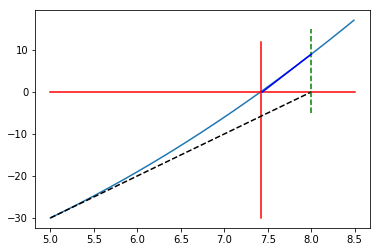

In [64]:
#Error Plot
#What is square root of 55?
plotData = [(x**2-55,x) for x in numpy.arange(5.0,8.5,0.01)]
p.plot([y[1] for y in plotData],[x[0] for x in plotData],)
p.plot([5.0,8.5],[0,0],'r-')
p.plot([numpy.sqrt(55),numpy.sqrt(55)],[12,-30],'r-')
p.plot([5.0,8.0],[-30,0],'k--')
p.plot([8.0,8.0],[-5,15],'g--')
p.plot([8.0,8.0-(9.0/16)] , [9.0,0.0],'b')

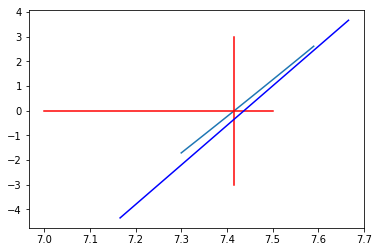

In [65]:
plotData = [(x**2-55,x) for x in numpy.arange(7.3,7.6,0.01)]
p.plot([y[1] for y in plotData],[x[0] for x in plotData],)
p.plot([7.0,7.5],[0,0],'r-')
p.plot([numpy.sqrt(55),numpy.sqrt(55)],[3,-3],'r-')
xs = [numpy.sqrt(55)-1/4,numpy.sqrt(55)+1/4]
p.plot(xs , [16*x-119 for x in xs],'b')

In [66]:
import pandas as pd

#Constants
guesses = [8.0]
errors = [10000]
tolerance = 0.01

In [67]:
#Local Functions
def cube (x):
    return(x**3)

def derivCube (x):
    return(3*x**2)
    

In [ ]:
while (abs(errors[-1]) > tolerance):
    errors.append(128 - cube(guesses[-1]))
    guesses.append(errors[-1]/derivCube(guesses[-1]) + guesses[-1])

pd.DataFrame({
    'errors' : errors,
    'guesses' :guesses
})

,errors,guesses
0,10000.000000,8.000000
1,-384.000000,6.000000
2,-88.000000,5.185185
3,-11.409643,5.043729
4,-0.308434,5.039687
5,-0.000247,5.039684


## A freestanding version

In [ ]:
def cube (x):
    return x**3

def derivCube (x):
    return 3*x**2

def cubeRoot(n,initGuess = 5.0):
    guesses = [initGuess]
    errors = [10000.0]
    tolerance = 0.01
    i = 0
#    while not (errors[-1] < tolerance):
    while (abs(errors[-1]) > tolerance):
        curError = n - cube(guesses[-1])
#        print("curError = %f" % curError)
        errors.append(curError)
        newGuess = errors[-1]/derivCube(guesses[-1]) + guesses[-1]
#       print ("newGuess = %f" % newGuess)
        guesses.append(newGuess)

    return(guesses[-1])

def main():
    testNum = input("Cube root of ?\n")
    print ("Answer is: %f\n" % cubeRoot(float(testNum)))

if __name__ == "__main__":
    main()
